In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
adam = pd.read_csv('./log/adam.log')
ada = pd.read_csv('./log/ada.log')

In [3]:
print (adam.to_string())
print (ada.to_string())

     batch_size  l2_lambda      eta   rmse_val
0            10     0.0000   0.0010   5.383751
1            10     0.0000   0.0100   5.392680
2            10     0.0000   1.0000   7.207943
3            10     0.0000   0.0001   5.403325
4            10     0.0000  10.0000  46.488427
5            10     0.0000   0.1000   5.966714
6            10     1.0000   1.0000   8.375852
7            10     1.0000   0.1000   5.802905
8            10     1.0000   0.0010   5.385916
9            10     1.0000   0.0100   5.367575
10           10     1.0000  10.0000  31.578551
11           10     1.0000   0.0001   5.403436
12           10     0.1000   0.0001   5.401648
13           10     0.1000   0.0010   5.383821
14           10     0.1000   0.0100   5.347904
15           10     0.1000   0.1000   5.881884
16           10     0.1000  10.0000  40.950714
17           10     0.1000   1.0000   8.737534
18           10     0.0100   0.1000   5.972752
19           10     0.0100   0.0001   5.402847
20           

In [4]:
adam_slice = adam[adam.rmse_val > 6]
print (adam_slice.to_string())

ada_slice = ada[ada.rmse_val > 6]
print (ada_slice.to_string())

     batch_size  l2_lambda   eta   rmse_val
2            10     0.0000   1.0   7.207943
4            10     0.0000  10.0  46.488427
6            10     1.0000   1.0   8.375852
10           10     1.0000  10.0  31.578551
16           10     0.1000  10.0  40.950714
17           10     0.1000   1.0   8.737534
21           10     0.0100   1.0   8.019087
22           10     0.0100  10.0  36.459327
26           10     0.0010   1.0   7.976797
27           10     0.0010  10.0  38.392647
30           10     0.0001   1.0   8.234490
31           10     0.0001  10.0  43.216075
39           50     0.0000  10.0   7.293911
42           50     1.0000  10.0   7.350596
53           50     0.1000  10.0   6.574878
54           50     0.0100  10.0   7.505700
64           50     0.0010  10.0   7.743735
70           50     0.0001  10.0   7.633691
75          100     0.0000  10.0   6.131868
84          100     0.1000  10.0   6.271335
92          100     0.0100  10.0   6.575337
100         100     0.0010  10.0

In [5]:
adam_slice = adam[(adam.eta == 0.01)&(adam.l2_lambda == 0.01)]
ada_slice = ada[(ada.l2_lambda == 0.01)&(ada.batch_size == 50)]

adam_slice

,batch_size,l2_lambda,eta,rmse_val
20,10,0.01,0.01,5.378822
57,50,0.01,0.01,5.378651
90,100,0.01,0.01,5.381960
129,500,0.01,0.01,5.387921
162,1000,0.01,0.01,5.398392


In [6]:
def plot_figure(x, y, x_label, y_label, title=None, x_lim=None, y_lim=None, x_log_scale = False, y_log_scale = False, show=False, save_path=None): 
    
    fig_pixel_x, fig_pixel_y = 1440, 720
    fig_dpi = 200

    fig, ax = plt.subplots(figsize=(fig_pixel_x/fig_dpi, fig_pixel_y/fig_dpi), dpi=fig_dpi)
    
    ax.plot(x, y, 'bo-', linewidth=0.7)
    
    ax.set(xlabel=x_label, ylabel=y_label)
    if title: 
        ax.set(title=title)
    
    if x_lim: 
        ax.set_xlim(x_lim)
    if y_lim:
        ax.set_ylim(y_lim)
    
    if x_log_scale: 
        ax.set_xscale("log", nonposx='clip')
    if y_log_scale: 
        ax.set_yscale("log", nonposy='clip')
    
    if save_path:
        fig.savefig(save_path, transparent=False, dpi=fig_dpi)
    
    if show: 
        plt.show()

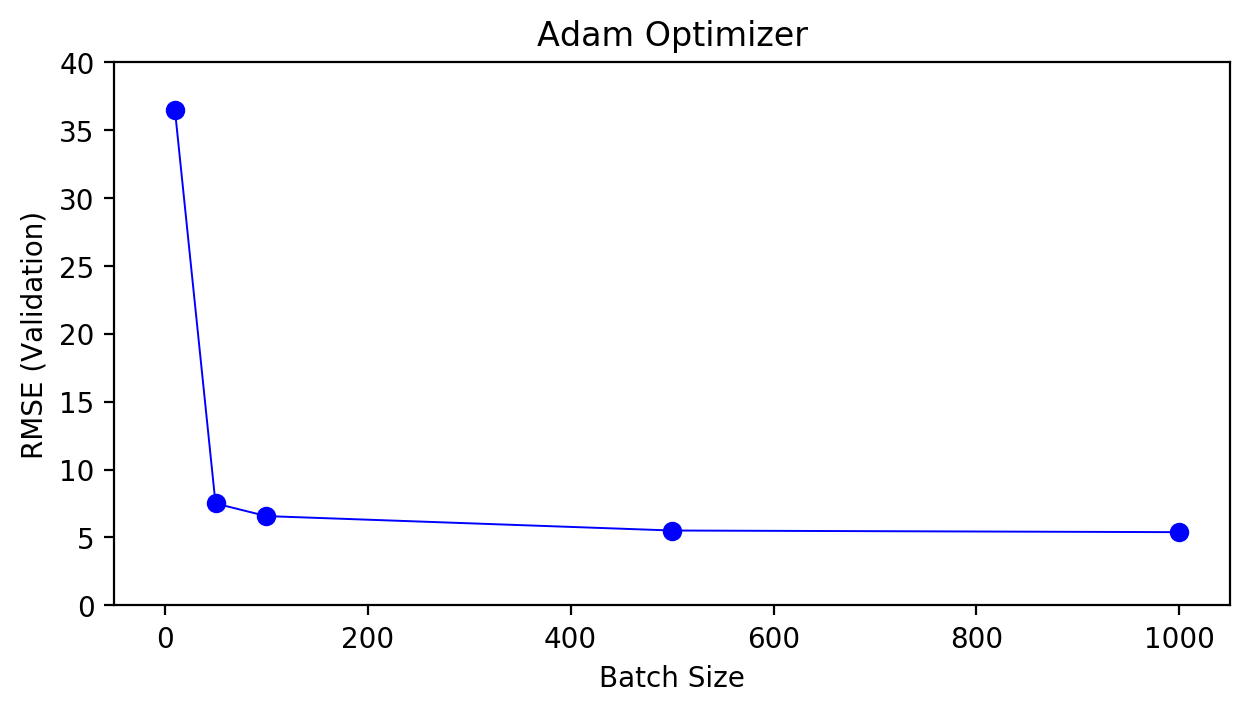

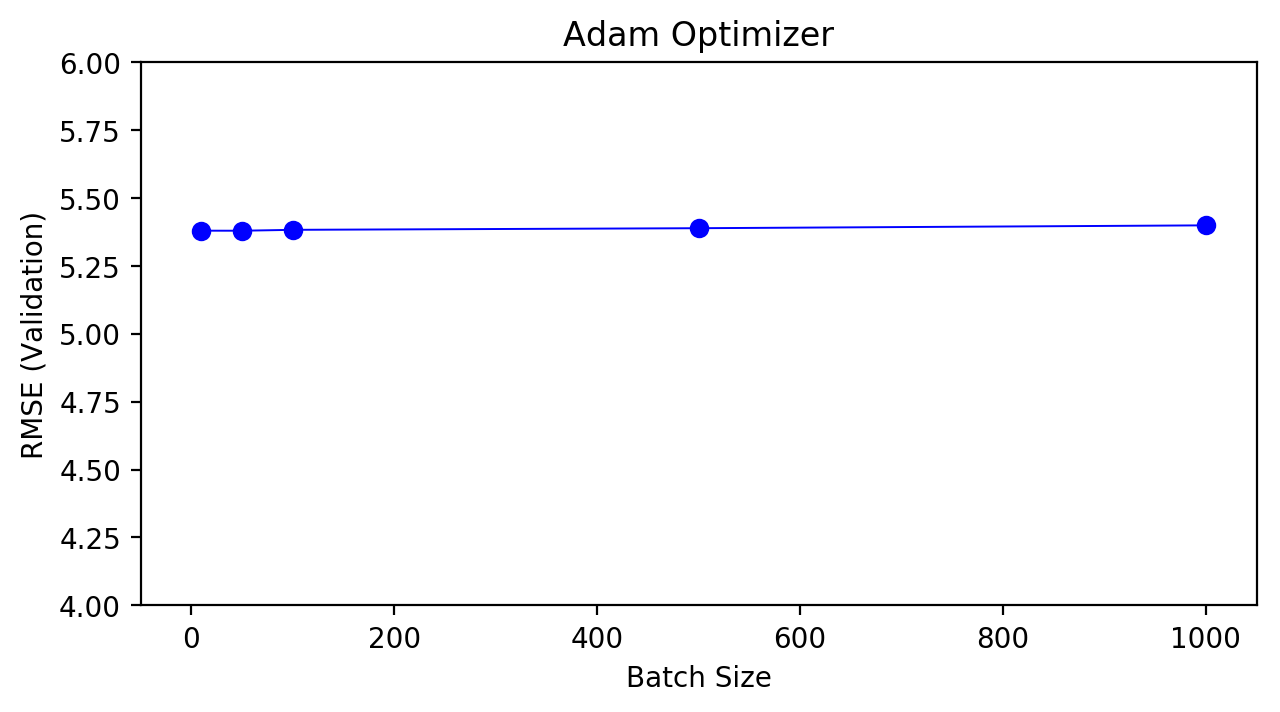

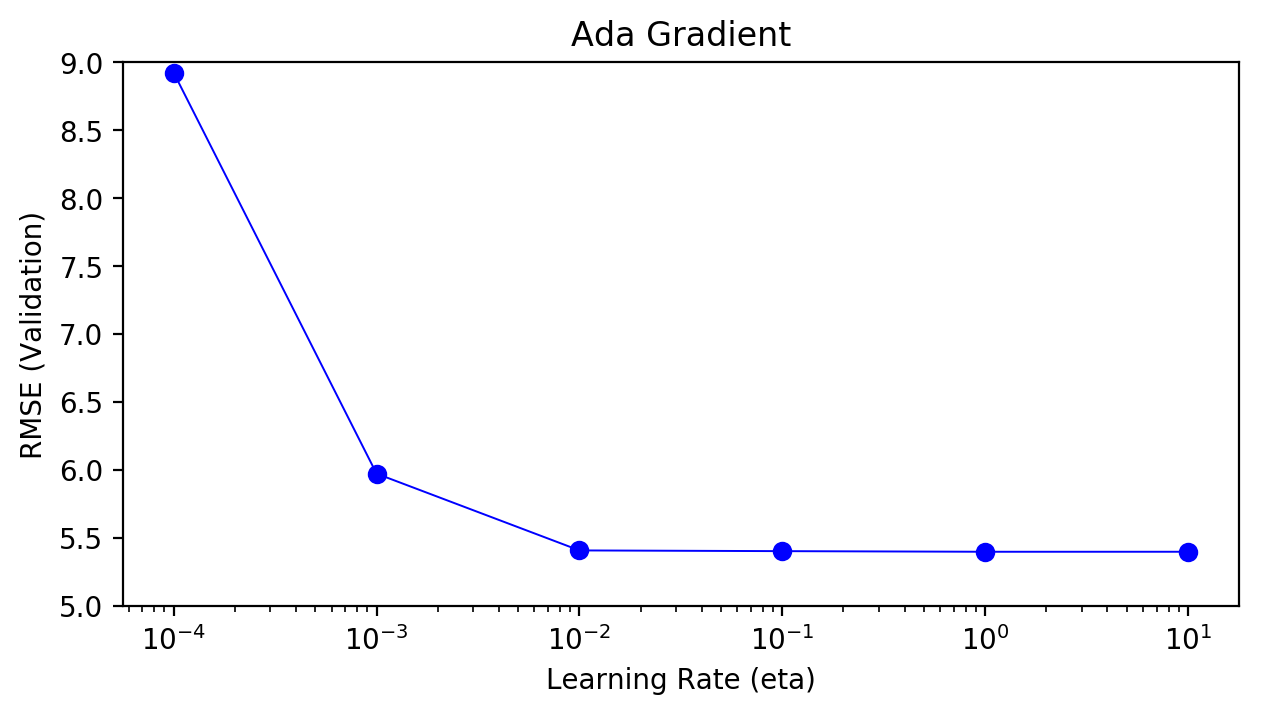

In [7]:

# eta == 10, l2_lambda == 0.01, batch_size: 10, 50, 100, 500, 1000

adam_slice = adam[(adam.eta == 10)&(adam.l2_lambda == 0.01)].sort_values(by=['batch_size'])
y = adam_slice.reset_index(drop=True, inplace=False).rmse_val
x = adam_slice.reset_index(drop=True, inplace=False).batch_size
save_path = 'batch_size-eta_{}_l2_lambda{}.png'.format(10, 0.01)

plot_figure(x, y, x_label='Batch Size', y_label='RMSE (Validation)', title="Adam Optimizer", 
            x_lim=(-50, 1050), y_lim=(0, 40), save_path=save_path)


# eta == 0.01, l2_lambda == 0.01, batch_size: 10, 50, 100, 500, 1000

adam_slice = adam[(adam.eta == 0.01)&(adam.l2_lambda == 0.01)].sort_values(by=['batch_size'])
y = adam_slice.reset_index(drop=True, inplace=False).rmse_val
x = adam_slice.reset_index(drop=True, inplace=False).batch_size
save_path = 'batch_size-eta_{}_l2_lambda{}.png'.format(0.01, 0.01)

plot_figure(x, y, x_label='Batch Size', y_label='RMSE (Validation)', title="Adam Optimizer", 
            x_lim=(-50, 1050), y_lim=(4, 6), save_path=save_path)


# l2_lambda == 0.01, batch_size == 50, eta: 1e-4, 1e-3, 1e-2, 1e-1, 1, 10

ada_slice = ada[(ada.l2_lambda == 0.01)&(ada.batch_size == 50)].sort_values(by=['eta'])
y = ada_slice.reset_index(drop=True, inplace=False).rmse_val
x = ada_slice.reset_index(drop=True, inplace=False).eta
save_path = 'eta-batch_size_{}_l2_lambda{}.png'.format(50, 0.01)

plot_figure(x, y, x_label='Learning Rate (eta)', y_label='RMSE (Validation)', title="Ada Gradient", 
            y_lim=(5, 9), x_log_scale=True, save_path=save_path)
